<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>


# Logistic Regression

In this lab, we will explore the Logistic Regression algorithm, a powerful tool for binary classification problems in various domains. By mastering Logistic Regression, you'll gain insights into more complex methods used for classification tasks, essential for advanced data science applications.

Imagine using historical data to predict the likelihood of project delays in construction projects based on factors such as project size, contract type, and number of workers. This predictive capability can help engineers manage risks more effectively and make informed decisions about project management strategies. These are examples of decision-making scenarios in construction where Logistic Regression can provide clear insights and predictions.

At its core, Logistic Regression is a supervised learning method used for binary classification. The algorithm models the probability of a binary outcome based on one or more independent variables, making it intuitive and easy to understand. Logistic Regression uses the logistic function to map predicted values to probabilities between 0 and 1.

### Objectives:

During this lab, we will explore several key aspects of the Logistic Regression algorithm, including:

- **Data Preparation**: Learn to prepare and clean your data, ensuring it is suitable for building a Logistic Regression model.
- **Model Building**: Construct a Logistic Regression model to predict binary outcomes based on a range of input features.
- **Model Evaluation**: Evaluate the performance of your Logistic Regression model and learn to interpret its results to make informed decisions.
- **Advanced Evaluation Metrics**: Understand and apply advanced evaluation metrics such as Confusion Matrix, Jaccard Index and Log Loss to assess model performance.

By the end of this lab, you will not only understand how the Logistic Regression algorithm functions but also how to implement it to solve real-world problems effectively within the construction field. So, let's dive into the detailed and fascinating world of Logistic Regression!

## Introduction to Logistic Regression

#### Overview

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a binary variable (in which there are only two possible outcomes). It is used extensively in various fields, including machine learning, most commonly for binary classification problems.

#### Comparing Logistic Regression with Linear Regression

To understand logistic regression, it's helpful to compare it with linear regression:
- **Linear Regression:** Used when the dependent variable is continuous and nature of the relationship between independent variables and the dependent variable is presumed to be linear. Linear regression predictions are unbounded (which means they can range from negative to positive infinity).
- **Logistic Regression:** Unlike linear regression, logistic regression is used when the response variable is categorical. The outputs of logistic regression are probabilities that lie between 0 and 1, and are modeled using a logistic function.

#### The Logistic Function

The logistic function, also called the sigmoid function, is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits. In logistic regression, the logistic function is used to model the probability that a given input point belongs to the class 1.

#### Mathematical Formula

The probability that an outcome belongs to a certain class (class 1) can be modeled with the logistic function:

$$
Probability Of a Class (Class 1) =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

Where:
- $ P(Y=1|X) $ is the probability that the outcome variable $ Y $ is class 1 given the predictors $ X $.
- $ \sigma $ is the logistic function.
- $ \theta $ represents the regression coefficients.
- $ X $ is the vector of input features.

#### Visual Representation of the Logistic Function

To help visualize the logistic function, we plot it using Matplotlib in Python.


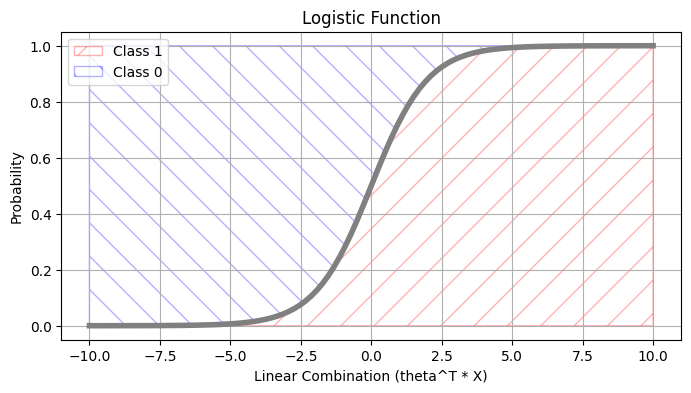

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of values from -10 to 10, which represent linear combinations of inputs
x = np.linspace(-10, 10, 100)
# Calculate the logistic of these values
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 4))
plt.plot(x, y, color='grey', linewidth=4)

# Fill lower area with hatching
plt.fill_between(x, 0, y, color='none', hatch='/', edgecolor='red', alpha=0.3, label='Class 1')
# Fill upper area with hatching
plt.fill_between(x, y, 1, color='none', hatch='\\', edgecolor='blue', alpha=0.3, label='Class 0')


plt.title('Logistic Function')
plt.xlabel('Linear Combination (theta^T * X)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

This plot shows how changes in the linear combination of input features affect the probability of the output being in one class or the other.

### Step 1: Import necessary libraries

In [86]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, jaccard_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Step 2: Load the dataset

In [87]:
# Load the Culvert Dataset
data = pd.read_csv('https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/Augmented%20Culvert%20Dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,Steel Plate,Arch,Somewhat excessively drained,6.5,7.6,0.0,Fine Sandy Loam,Occasional,1,86,0
1,24.0,Corrugated Steel,Round,Poorly drained,3.8,5.7,0.0,Fine Sandy Loam,Frequent,2,50,0
2,21.0,Unreinforced Concrete,Box,Poorly drained,14.8,6.7,0.0,Moderately Decomposed Plant Material,Occasional,1,62,0
3,21.0,Unreinforced Concrete,Box,Well drained,10.3,9.4,5.7,Clay Loam,NaN,1,75,0
4,36.0,Corrugated Steel,Round,Moderately well drained,2.6,5.3,0.0,Fine Sandy Loam,NaN,2,43,0


#### `Augmented Culvert Dataset.csv`:

**Context:**
This dataset focuses on the condition assessment of culverts based on their physical and environmental attributes. Culverts are structures that allow water to flow under a road, railroad, trail, or similar obstruction. It comprises 4,435 records collected from four different states, combining their individual culvert inventories into a robust dataset suitable for multiclass classification.

**Target:**
The target variable of the dataset is the condition of the culverts, categorized into various classes representing different levels of structural integrity and functionality. The culvert condition rating ranges from 0 to 4, where 0 represents a critical condition and 4 represents an excellent condition.

**Attributes:**
1. length: The length of the culvert (in feet).
2. cul_matl (Culvert Material): Material of the culvert, such as Corrugated Steel or Poly Vinyl Chloride.
3. cul_type (Culvert Type): Shape or type of the culvert, e.g., Round.
4. Soil_Drainage_Class: Classification of the soil drainage at the culvert location.
4. Soil_Moisture: Soil moisture level at the culvert location.
4. Soil_pH: Soil pH level, indicating the acidity or alkalinity.
4. Soil_Elec_Conductivity (Soil Electrical Conductivity): Measures the soil's ability to conduct electric current.
4. Soil_Surface_Texture: Texture of the soil surface around the culvert.
4. Flooding_Frequency: Frequency of flooding at the culvert location.
4. State: State in which the culvert is located.
4. Age: Age of the culvert (in years, since installation).
12. Cul_rating (Culvert Rating): The culvert condition rating.

These features are used to predict the condition of the culverts, in order to prioritize maintenance and inspection efforts efficiently.

### Step 3: Pre-processing

**Handling Missing Data: Filling Blanks**

We must identify any blank values to ensure our data is ready for training. The command `data.isnull().sum()` checks each column for missing entries and sums them.

In [88]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

length                       0
cul_matl                     0
cul_type                     0
Soil_Drainage_Class          0
Soil_Moisture                0
Soil_pH                      0
Soil_Elec_Conductivity       0
Soil_Surface_Texture         0
Flooding_Frequency        3468
State                        0
Age                          0
Cul_rating                   0
dtype: int64


The 'Flooding_Frequency' column in our dataset has 3,468 missing values. To handle this, we use a command that fills these blanks with 'None.' This method is chosen because, in this specific dataset, no entry in 'Flooding_Frequency' suggests that there was no flooding (but this is not always the case so be careful!). While there are many strategies to deal with missing data, this approach is particularly suited to our data’s specific characteristics.

In [89]:
# Fill missing values with a specific category, e.g., 'None'
data['Flooding_Frequency'].fillna(value='None', inplace=True)
data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,Steel Plate,Arch,Somewhat excessively drained,6.5,7.6,0.0,Fine Sandy Loam,Occasional,1,86,0
1,24.0,Corrugated Steel,Round,Poorly drained,3.8,5.7,0.0,Fine Sandy Loam,Frequent,2,50,0
2,21.0,Unreinforced Concrete,Box,Poorly drained,14.8,6.7,0.0,Moderately Decomposed Plant Material,Occasional,1,62,0
3,21.0,Unreinforced Concrete,Box,Well drained,10.3,9.4,5.7,Clay Loam,None,1,75,0
4,36.0,Corrugated Steel,Round,Moderately well drained,2.6,5.3,0.0,Fine Sandy Loam,None,2,43,0


**Make the Target Binary**

We adjust the 'Cul_rating' column to create a binary target for logistic regression analysis. Ratings of 0 and 1 are categorized as 0 (needs repair), while ratings of 2, 3, and 4 are categorized as 1 (satisfactory to good condition). This simplifies the dataset for analyzing the necessity of repairs.

In [90]:
# Create a new list to store the binary values
binary_ratings = []

# Loop through each rating in the 'Cul_rating' column
for rating in data['Cul_rating']:
    # If the rating is 0 or 1, it indicates the structure needs repair
    if rating in [0, 1]:
        binary_ratings.append(0)
    # Otherwise, the rating indicates the structure is in satisfactory to good condition
    else:
        binary_ratings.append(1)

# Replace the original 'Cul_rating' column with the new binary values
data['Cul_rating'] = binary_ratings


## Practice
Let's calculate and display the number of rows in the dataset for each class of the binary target variable 'Cul_rating'. This helps to understand the distribution of classes and ensure that our data is balanced enough for effective logistic regression analysis.

In [91]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python  
# Use value_counts to count the occurrences of each class in the 'Cul_rating' column
target_counts = data['Cul_rating'].value_counts()

# Print the total number of unique targets and the count of rows for each target
print("Number of unique targets:", target_counts.size)
print("Target counts:", target_counts.to_dict())
```

</details>

**Handling Categorical Features for Logistic Regression**


In logistic regression, it's essential to handle categorical features properly because the algorithm requires numerical input to perform calculations. Categorical variables like 'cul_matl', 'cul_type', and others listed in your dataset are typically stored as text or categories which are not directly interpretable by logistic regression models.

By applying the `LabelEncoder`, we transform these categorical labels into numerical values. This numerical transformation ensures that the logistic regression algorithm can effectively incorporate these features into its predictive model. Storing the label encoder for each column also allows us to reverse the transformation if needed, which can be useful for interpreting the model's predictions or applying the model to new data while maintaining consistency in how categories are encoded.

In [92]:
# List of categorical columns that need to be label-encoded
categorical_columns = ['cul_matl', 'cul_type', 'Soil_Drainage_Class', 'Soil_Surface_Texture', 'Flooding_Frequency']

# Applying LabelEncoder to the categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the label encoder for each column

data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,5,0,3,6.5,7.6,0.0,12,2,1,86,0
1,24.0,1,4,2,3.8,5.7,0.0,12,0,2,50,0
2,21.0,6,1,2,14.8,6.7,0.0,28,2,1,62,0
3,21.0,6,1,6,10.3,9.4,5.7,4,1,1,75,0
4,36.0,1,4,1,2.6,5.3,0.0,12,1,2,43,0


### Step 4: Extracting Features and Target
We extract the features (X) and the target variable (y) from the dataset. Features are all columns except 'Cul_rating'. 'Cul_rating' represents whether the culvert needs to be repaired (0) or not (1).

In [93]:
# Prepare the data
X = data.drop('Cul_rating', axis=1)
y = data['Cul_rating']

### Step 5: Normalizing Data

**Why Normalize the Data?**

Normalization scales features to have a mean of 0 and a standard deviation of 1. This is important because:

1. **Equal Contribution**: Ensures all features contribute equally to the model.
2. **Faster Convergence**: Helps gradient-based algorithms converge faster.
3. **Improved Accuracy**: Leads to more stable and accurate predictions.
4. **Prevents Issues**: Avoids numerical problems with features of different scales.

Here is the code to normalize data using `StandardScaler` from scikit-learn:

In [94]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.09,  0.76, -1.87, -0.58, -0.52,  0.64, -0.34, -1.1 ,  0.73,
        -0.96,  1.78],
       [-0.45, -1.13,  0.78, -1.05, -0.93, -0.75, -0.34, -1.1 , -1.27,
         0.04,  0.42],
       [-0.49,  1.23, -1.21, -1.05,  0.73, -0.02, -0.34,  0.15,  0.73,
        -0.96,  0.87],
       [-0.49,  1.23, -1.21,  0.82,  0.05,  1.97,  1.12, -1.73, -0.27,
        -0.96,  1.37],
       [-0.28, -1.13,  0.78, -1.52, -1.12, -1.05, -0.34, -1.1 , -0.27,
         0.04,  0.16]])

## Practice

How many rows and colmns does X have?

In [95]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python   
print("Number of rows in X:", X.shape[0])
print("Number of columns in X:", X.shape[1])
```

</details>

### Step 6: Create train and test datasets
In this step, we split the dataset into a training set and a testing set. In this example, we use a 75-25 split, with 75% of the data for training and 25% for testing.

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Practice

Print the shape of `X_train`, `X_test`, `y_train`, and `y_test`.

In [97]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python   
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
```

</details>

### Step 7: Initializing and Training the Logistic Regression Classifier

When we utilize the __LogisticRegression__ class from the Scikit-learn library, we are employing a powerful method for binary classification that can extend to multi-class problems under certain settings. This classifier employs various optimization algorithms to determine the best coefficients for your model. Here are some of the key parameters you can tweak:

1. **solver**: This parameter selects the algorithm used for optimization. Choices like 'liblinear' are great for smaller datasets, while 'lbfgs' is typically preferred for larger sets due to its robustness in handling various problems.

2. **C**: This parameter controls the strength of regularization in the logistic regression model. Regularization helps prevent the model from overfitting by penalizing overly complex models. A higher value of **C** means less regularization (weaker penalty for complexity), allowing the model to fit the training data better. Conversely, a lower value of **C** means more regularization (stronger penalty for complexity), which helps to generalize the model by preventing it from fitting too closely to the training data. Adjusting **C** helps find a good balance between fitting the data well and maintaining the model's ability to perform well on new, unseen data.

3. **max_iter**: This controls the solver's maximum number of iterations. It's an important parameter because it ensures that the optimization process terminates, allowing you to control the trade-off between computational time and model accuracy.

These parameters are crucial for fitting your logistic regression model to your specific dataset and predictive accuracy requirements.

In [98]:
# Train the model
model = LogisticRegression(C=0.008, solver='liblinear')
model.fit(X_train, y_train)

# Retrieve and print model parameters, each on a new line
params = model.get_params()
print('Model Parameters:')
for key, value in params.items():
    print(f'{key}: {value}')

Model Parameters:
C: 0.008
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: liblinear
tol: 0.0001
verbose: 0
warm_start: False


### Step 8: Making Predictions
We use the trained Logistic Regression classifier to make predictions on the test data.

Logistic regression outputs probabilities that indicate the likelihood of each class. These probabilities are then converted into binary predictions based on a threshold, typically 0.5.

For instance, as you can see here if the predicted probability for class "0" is greater than or equal to 0.5, the model predicts that class; otherwise, it predicts class "1". This process allows us to understand how confident the model is in its predictions and provides insight into the model's performance.

In [99]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [100]:
ytest_probability = model.predict_proba(X_test)
ytest_probability[:15]

array([[0.79, 0.21],
       [0.7 , 0.3 ],
       [0.85, 0.15],
       [0.68, 0.32],
       [0.63, 0.37],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.66, 0.34],
       [0.42, 0.58],
       [0.13, 0.87],
       [0.38, 0.62],
       [0.59, 0.41],
       [0.43, 0.57],
       [0.13, 0.87],
       [0.03, 0.97]])

### Step 9: Evaluating the Model

In this step, we will evaluate the performance of our logistic regression model using various metrics: Accuracy Score, Jaccard Index, Confusion Matrix, F1 score, and Log Loss. These metrics will provide us with a comprehensive understanding of how well our model is performing.
1. Accuracy Score

In [101]:
# Checking the accuracy of the model on the training set and testing set
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7817197835237523
Test Accuracy: 0.7646528403967539


The logistic regression model achieved a train accuracy of 78.17% and a test accuracy of 76.47%, indicating a good fit to the training data with a slightly lower but comparable performance on the test data, suggesting moderate generalizability.

2. Jaccard Index

The Jaccard Index measures the accuracy of the model by comparing the size of the intersection of the predicted labels and true labels to the size of their union. It ranges from 0 to 1, where 1 indicates perfect accuracy.

In [102]:
# Calculating Jaccard Index
jaccard = jaccard_score(y_test, y_pred)
print("Jaccard Index:", jaccard)


Jaccard Index: 0.6597131681877445


3. Confusion Matrix

The Confusion Matrix provides a detailed breakdown of the classification performance, showing the counts of true positives, true negatives, false positives, and false negatives.

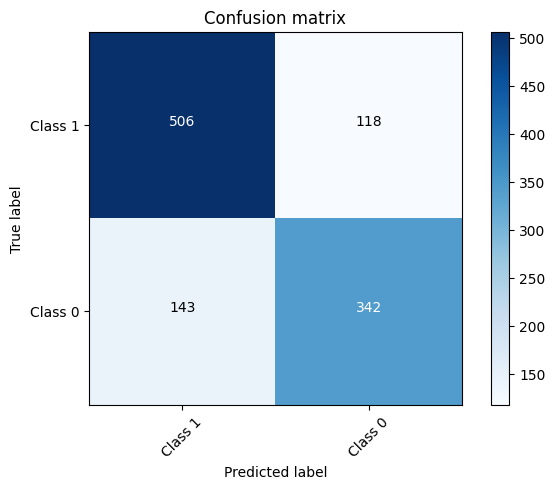

In [103]:
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(['Class 1', 'Class 0']))
plt.xticks(tick_marks, ['Class 1', 'Class 0'], rotation=45)
plt.yticks(tick_marks, ['Class 1', 'Class 0'])

# Annotate the confusion matrix
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > cnf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix provides a detailed insight into the performance of our logistic regression model, specifically designed to predict the condition of culverts. Here's a detailed explanation based on the matrix:

- **First row:** This row represents the instances where the true label is Class 1 (satisfactory to good condition). We have 624 instances (506 + 118) where the actual condition of the culvert is satisfactory to good. Out of these, the model correctly identified 506 instances as Class 1, and incorrectly predicted 118 instances as Class 0 (needs repair). This means that the model successfully identified 506 culverts as being in satisfactory to good condition but failed to recognize 118 culverts, misclassifying them as needing repair.

- **Second row:** This row represents the instances where the true label is Class 0 (needs repair). We have 485 instances (143 + 342) where the actual condition of the culvert is in need of repair. Out of these, the model correctly identified 342 instances as Class 0, but incorrectly predicted 143 instances as Class 1. This shows that the model was able to correctly identify 342 culverts that needed repair but misclassified 143 culverts as being in satisfactory to good condition.

We use the confusion matrix to understand the situation of our classification. Some misclassifications are more critical than others. For example, the 143 cases where the actual condition needed repair, but the model classified them as satisfactory, represent a significant concern. Misclassifying culverts that need repair as being in good condition can lead to safety risks and maintenance oversights, highlighting the importance of accurately identifying such instances.

4. F1 score

In [104]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       485
           1       0.78      0.81      0.79       624

    accuracy                           0.76      1109
   macro avg       0.76      0.76      0.76      1109
weighted avg       0.76      0.76      0.76      1109



Based on the evaluation metrics provided in the report, here’s a concise analysis:

- **Precision:** Precision indicates the accuracy of the positive predictions. For Class 0, the precision is 0.74, meaning 74% of the predictions for needing repair were correct. For Class 1, the precision is 0.78, meaning 78% of the predictions for satisfactory condition were correct.

- **Recall:** Recall measures the model's ability to identify all relevant instances. For Class 0, the recall is 0.71, meaning 71% of the actual cases needing repair were correctly identified. For Class 1, the recall is 0.81, indicating 81% of the satisfactory cases were correctly classified.

- **F1 Score:** The F1 score is the harmonic mean of precision and recall, balancing both metrics. For Class 0, the F1 score is 0.72, and for Class 1, it is 0.79. These scores indicate a good balance between precision and recall for both classes.

The confusion matrix and these metrics help us understand the model's performance and highlight critical misclassifications, such as the 143 cases where necessary repairs were missed, which is a significant concern.

5. Log Loss

Log Loss, or Logarithmic Loss, measures the performance of a classification model where the prediction output is a probability value between 0 and 1. Lower log loss indicates better model performance.

In [105]:
from sklearn.metrics import log_loss

# Calculating Log Loss
log_loss_value = log_loss(y_test, ytest_probability)
print("Log Loss:", log_loss_value)


Log Loss: 0.5010899308388933


## Practice

Create a new Logistic Regression model using the same dataset, but this time, experiment with different solver and regularization parameters. After training your model, assess its performance by analyzing the confusion matrix and classification report.

In [106]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python    
# Create a new Logistic Regression model with different solver and regularization parameters
model = LogisticRegression(solver='saga', C=0.3)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Assess the model's performance
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
class_report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

```

</details>

### Thank you and good luck!